In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix, recall_score, precision_score
%matplotlib inline

data_set_link = "https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset"
url = "https://raw.githubusercontent.com/AlsuKhairullina/Data_analysis/main/heart.csv"
df = pd.read_csv(url)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **EDA**

---



## **О датасете**

**Age** : возраст пациента

**Sex** : пол пациента
* 0 = мужчина
* 1 = женщина

**exang**: есть ли у пациента стенокардия, вызванная физической нагрузкой
* 0 = нет
* 1 = да


**caa**: Количество крупных сосудов (0-3)

**slp**: наклон сердечного ритма

**cp** : Тип боли в груди


*   0 = отсутствие симптома
*   1 = типичная стенокардия
*   2 = атипичная стенокардия
*   3 = неангинозная боль


**trtbps** : артериальное давление в покое (в мм рт. ст.)

**chol** : холестерин в мг/дл, полученный с помощью датчика ИМТ

**fbs** : уровень сахара в крови натощак > 120 мг/дл 
* 0 = нет
*1 = да

**oldpeak**: предыдущий пик

**rest_ecg** : результаты электрокардиографии в покое


*   0 = нормальные
*   1 = наличие аномалии ST-T (инверсия зубца T и/или элевация или депрессия ST > 0,05 мВ)
* 2 = наличие вероятной или достоверной гипертрофии левого желудочка по критериям Эстеса


**thalach** : Количество раз, когда была достигнута максимальная частота сердечных сокращений

**thall**: является ли пациент носителем талассемии

* 0 = нет
* 1 = бессимптомный носитель
* 2 = альфа-талассемия, малая анемия
* 3 = анемия средней и средней степени тяжести



***target*** : 
* 0= меньше вероятность сердечного приступа
* 1= больше вероятность сердечного приступа


## *Статистическое описание и понимание данных*

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
df_descrete = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
df_continious = ['age','trtbps', 'chol', 'thalachh', 'oldpeak']
df_targetval = ['output']
print("Дискретные данные: ", df_descrete)
print("Непрерывные данные: ", df_continious)
print("Целевая переменная: ", df_targetval)

Дискретные данные:  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
Непрерывные данные:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Целевая переменная:  ['output']


## Очистка данных

### *Проверка на наличие повторяющихся и пропущенных значений*

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
sum(df.duplicated())

1

In [ ]:
df = df.drop_duplicates()

### *Обнаружение выбросов*

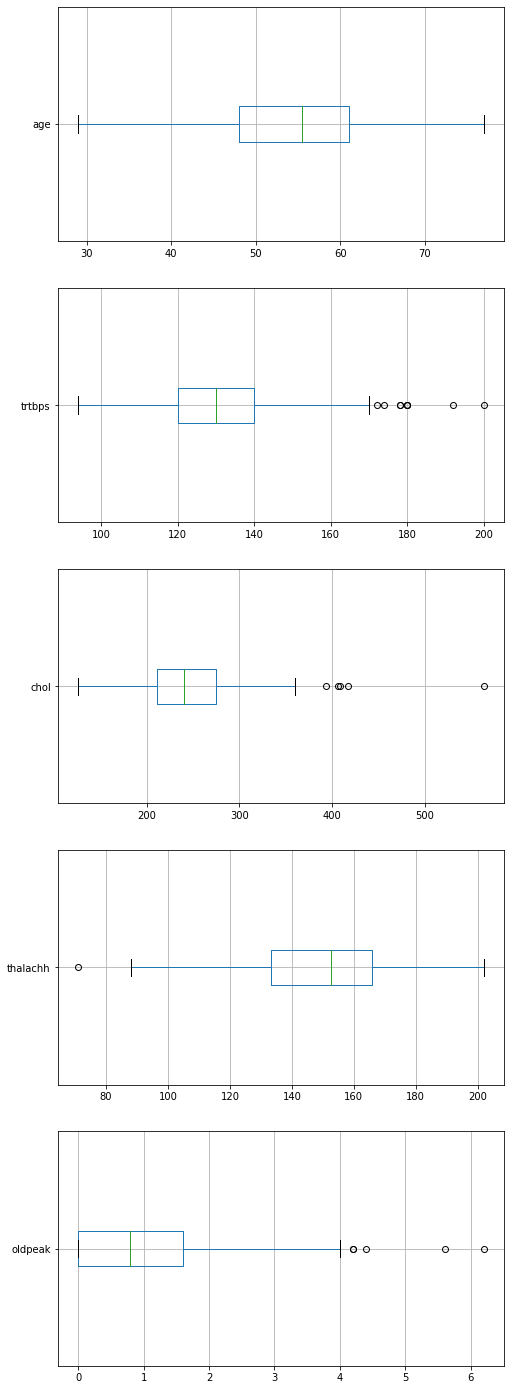

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(8, 25))
for i, c in enumerate(df_continious):
    f = df[[c]].boxplot(ax=axes[i], vert=False) 

In [ ]:
import statistics

def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit


In [ ]:
#Выбросы в показателях холестерина
upper,  lower = outliers(df, 'chol')
median = df['chol'].median()
df['chol']=np.where(df['chol']>upper, median ,np.where(df['chol']<lower,median,df['chol']))
#Выбросы в показателях thalachh
upper,  lower = outliers(df, 'thalachh')
median = df['thalachh'].median()
df['thalachh']=np.where(df['thalachh']>upper, median ,np.where(df['thalachh']<lower,median,df['thalachh']))
#Выбросы в показателях trtbps
upper,  lower = outliers(df, 'trtbps')
median = df['trtbps'].median()
df['trtbps']=np.where(df['trtbps']>upper, median ,np.where(df['trtbps']<lower,median,df['trtbps']))
#Выбросы в показателях oldpeak
upper,  lower = outliers(df, 'oldpeak')
median = df['oldpeak'].median()
df['oldpeak']=np.where(df['oldpeak']>upper, median ,np.where(df['oldpeak']<lower,median,df['oldpeak']))

In [ ]:
#upper = upper, lower = outliers(df, "chol")
#df = df[(df['chol'] > lower) & (df['chol'] < upper)]
#upper, lower = outliers(df, "thalachh")
#df = df[(df['thalachh'] > lower) & (df['thalachh'] < upper)]
#upper, lower = outliers(df, "trtbps")
#df = df[(df['trtbps'] > lower) & (df['trtbps'] < upper)]
#upper, lower = outliers(df, "oldpeak")
#df = df[(df['oldpeak'] > lower) & (df['oldpeak'] < upper)]

## *Визуализация данных*

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.276216,0.167959,0.119492,-0.111590,-0.386445,0.093216,0.208470,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.012997,-0.119194,0.046022,-0.060351,-0.039156,0.143460,0.101813,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.066031,-0.087723,0.096018,0.041561,0.288028,-0.392937,-0.133789,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.276216,-0.012997,0.066031,1.000000,0.093558,0.119910,-0.150313,-0.074837,0.004871,0.146000,-0.089660,0.122782,0.010628,-0.120370
chol,0.167959,-0.119194,-0.087723,0.093558,1.000000,0.007158,-0.097528,-0.029973,0.098971,0.008249,0.026612,0.078374,0.070071,-0.111863
fbs,0.119492,0.046022,0.096018,0.119910,0.007158,1.000000,-0.083081,-0.012352,0.024729,0.032492,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.150313,-0.097528,-0.083081,1.000000,0.052898,-0.068807,-0.090365,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.386445,-0.039156,0.288028,-0.074837,-0.029973,-0.012352,0.052898,1.000000,-0.393438,-0.338862,0.384745,-0.241528,-0.103015,0.415306
exng,0.093216,0.143460,-0.392937,0.004871,0.098971,0.024729,-0.068807,-0.393438,1.000000,0.310040,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.208470,0.101813,-0.133789,0.146000,0.008249,0.032492,-0.090365,-0.338862,0.310040,1.000000,-0.511397,0.192877,0.197205,-0.428879


видно, что существует слабая корреляция между:
*   типом боли в груди(cp) и вероятностью инсульта(output)
*   наклоном сердечного ритма(slp) и максимальным сердцебиением(thalachh)
*   Количеством крупных судов(saa) и возрастом(age)
*   вероятностью инсульта(output) и максимальным сердцебиением(thalachh)



***Распределение отдельных непрерывных величин***

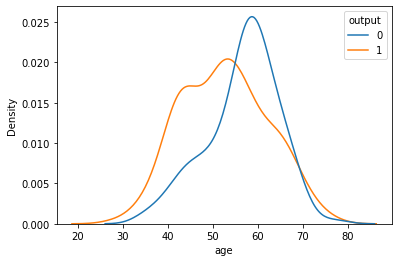

In [ ]:
sns.kdeplot(data=df, x="age", hue="output")

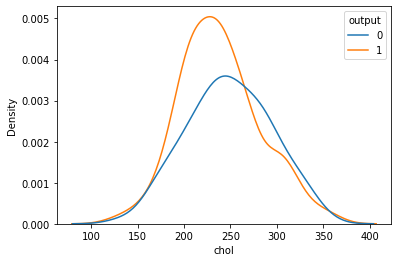

In [ ]:
sns.kdeplot(data=df, x="chol", hue="output")

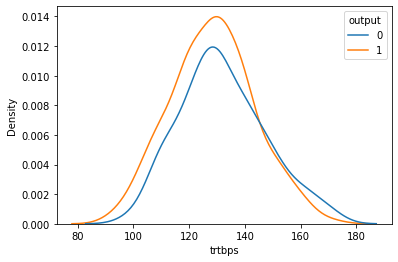

In [ ]:
sns.kdeplot(data=df, x="trtbps", hue="output")

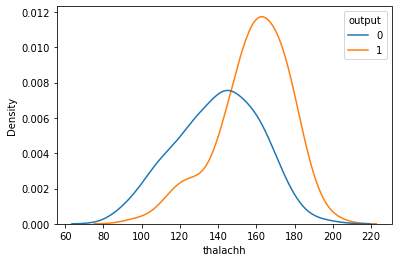

In [ ]:
sns.kdeplot(data=df, x="thalachh", hue="output")

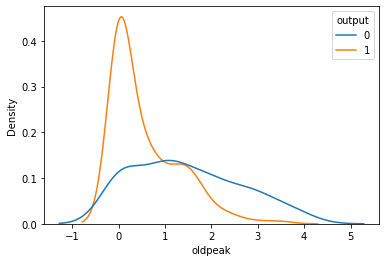

In [ ]:
sns.kdeplot(data=df, x="oldpeak", hue="output")

***Распределение дискретных признаков***

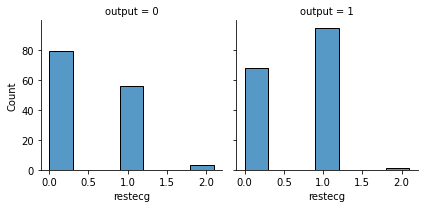

In [ ]:
g = sns.FacetGrid(df, col = 'output') 
g.map(sns.histplot, "restecg", binwidth=0.3 )   

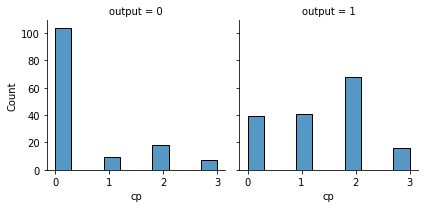

In [ ]:
g = sns.FacetGrid(df, col = 'output') 
g.map(sns.histplot, "cp", binwidth=0.3 )   

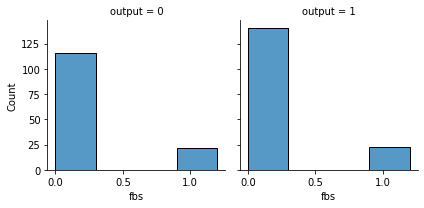

In [ ]:
g = sns.FacetGrid(df, col = 'output') 
g.map(sns.histplot, "fbs", binwidth=0.3 )   

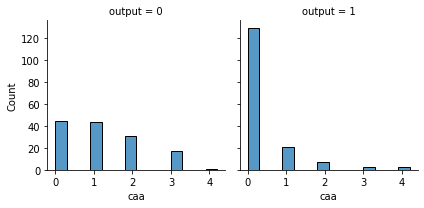

In [ ]:
g = sns.FacetGrid(df, col = 'output') 
g.map(sns.histplot, "caa", binwidth=0.3 )   

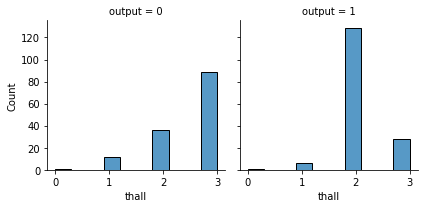

In [ ]:
g = sns.FacetGrid(df, col = 'output') 
g.map(sns.histplot, "thall", binwidth=0.3 )   

In [ ]:
#correlation of continious features
df_corr = df[df_continious].corr().transpose()
df_corr.style.background_gradient(cmap='coolwarm')

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.276216,0.167959,-0.386445,0.208470
trtbps,0.276216,1.000000,0.093558,-0.074837,0.146000
chol,0.167959,0.093558,1.000000,-0.029973,0.008249
thalachh,-0.386445,-0.074837,-0.029973,1.000000,-0.338862
oldpeak,0.208470,0.146000,0.008249,-0.338862,1.000000


In [ ]:
#correlation of categoral features
df_corr = df[df_categoral].corr().transpose()
df_corr.style.background_gradient(cmap='coolwarm')

,sex,cp,fbs,restecg,exng,slp,caa,thall
sex,1.000000,-0.051740,0.046022,-0.060351,0.143460,-0.032990,0.113060,0.211452
cp,-0.051740,1.000000,0.096018,0.041561,-0.392937,0.116854,-0.195356,-0.160370
fbs,0.046022,0.096018,1.000000,-0.083081,0.024729,-0.058654,0.144935,-0.032752
restecg,-0.060351,0.041561,-0.083081,1.000000,-0.068807,0.090402,-0.083112,-0.010473
exng,0.143460,-0.392937,0.024729,-0.068807,1.000000,-0.256106,0.125377,0.205826
slp,-0.032990,0.116854,-0.058654,0.090402,-0.256106,1.000000,-0.092236,-0.103314
caa,0.113060,-0.195356,0.144935,-0.083112,0.125377,-0.092236,1.000000,0.160085
thall,0.211452,-0.160370,-0.032752,-0.010473,0.205826,-0.103314,0.160085,1.000000


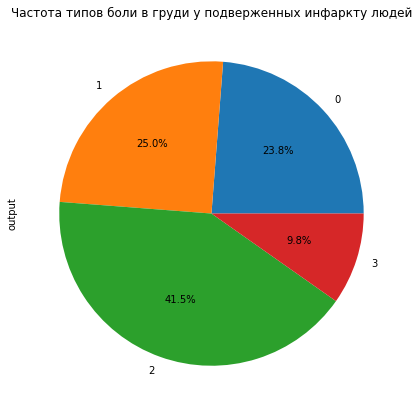

In [ ]:
df.groupby('cp')["output"].sum().plot(kind="pie",autopct='%1.1f%%',figsize=(7,7),
                title="Частота типов боли в груди у подверженных инфаркту людей")

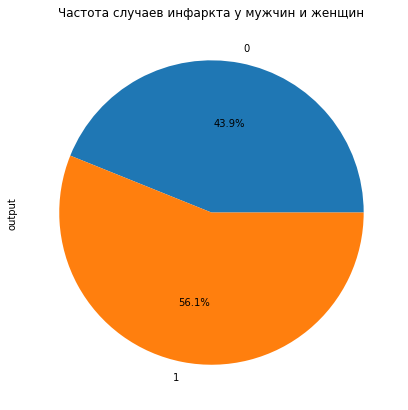

In [ ]:
df.groupby('sex')["output"].sum().plot(kind="pie",autopct='%1.1f%%',figsize=(7,7),
                title="Частота случаев инфаркта у мужчин и женщин")

# **Выводы:**


1.   У женщин выше вероятность получить инфаркт
2.   Люди, у которых наблюдаются аномалии в кардиограмме, больше подвержены риску сердечного приступа.
3. У людей с высоким максимальным значением сердцебиения наблюдается более высокая вероятность инфаркта
4. Испытывающие неангинозную боль в груди пациенты больше подвержены инфаркту.
5. Страдающие от незначительной анемии пациенты больше подвержены риску.



# **Моделирование**

### Preprocessing

In [ ]:
def onehot_encode(df, column_dict):
  df = df.copy()
  for column, prefix in column_dict.items():
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
  return df

In [ ]:
def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    df_categoral = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
    df = onehot_encode(df, dict(zip(df_categoral, ['CP', 'SL', 'TH', 'RSCG','SEX','FBS', 'EXNG','CAA'])))
    
    # Split df into X and y
    y = df['output'].copy()
    X = df.drop('output', axis=1).copy()
    
    # Scale X
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

In [ ]:
def preprocess_inputs_without_scaler(df):
    df_without_scaler = df.copy()
    
    # One-hot encode the nominal features
    df_categoral = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
    df_without_scaler = onehot_encode(df, dict(zip(df_categoral, ['CP', 'SL', 'TH', 'RSCG','SEX','FBS', 'EXNG','CAA'])))
    
    # Split df into X and y
    y = df_without_scaler['output'].copy()
    X = df_without_scaler.drop('output', axis=1).copy()
    
    return X, y

In [ ]:
X, y = preprocess_inputs(df, RobustScaler())

In [ ]:
X

,age,trtbps,chol,thalachh,oldpeak,CP_0,CP_1,SL_0,SL_1,SL_2,...,FBS_2,EXNG_0,EXNG_1,EXNG_2,EXNG_3,EXNG_4,CAA_0,CAA_1,CAA_2,CAA_3
0,0.576923,0.75,-0.117886,-0.087302,0.9375,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0
1,-1.423077,0.00,0.158537,1.087302,1.6875,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.115385,0.00,-0.589431,0.611111,0.3750,1.0,-1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.038462,-0.50,-0.069106,0.801587,0.0000,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.115385,-0.50,1.849593,0.325397,-0.1250,1.0,-1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,0.115385,0.50,0.012195,-0.944444,-0.3750,1.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
298,-0.807692,-1.00,0.386179,-0.658730,0.2500,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
299,0.961538,0.70,-0.768293,-0.373016,1.6250,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0
300,0.115385,0.00,-1.776423,-1.198413,0.2500,0.0,0.0,1.0,0.0,0.0,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 302, dtype: int64

### Training

*Data splitting*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (226, 30)
The shape of X_test is        (76, 30)
The shape of y_train is       (226,)
The shape of y_test is        (76,)


*Логистическая регрессия*

In [ ]:
LRclassifier = LogisticRegression()
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy: {:.2f}%'.format(LRAcc*100))


              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.93      0.93      0.93        42

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76

[[31  3]
 [ 3 39]]
Logistic Regression accuracy: 92.11%


*SVC*

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=300)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        34
           1       0.93      0.93      0.93        42

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76

[[31  3]
 [ 3 39]]
SVC accuracy: 92.11%


*Случайный лес*

In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 10, max_depth = 6)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.88      0.86      0.87        42

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76

[[29  5]
 [ 6 36]]
Random Forest accuracy: 85.53%


*Дерево решений*

In [ ]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        34
           1       0.86      0.76      0.81        42

    accuracy                           0.80        76
   macro avg       0.80      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76

[[29  5]
 [10 32]]
Decision Tree accuracy: 80.26%


*Градиентный бустинг*

In [ ]:
GBclassifier = GradientBoostingClassifier()
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

GBAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        34
           1       0.85      0.83      0.84        42

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76

[[28  6]
 [ 7 35]]
Decision Tree accuracy: 82.89%


In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression','SVC','Random Forest', 'Decision  Tree', 'Gradient Boosting'],
                        'Accuracy': [LRAcc*100, SVCAcc*100, RFAcc*100, DTAcc*100, GBAcc*100]})

compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,92.105263
1,SVC,92.105263
2,Random Forest,85.526316
4,Gradient Boosting,82.894737
3,Decision Tree,80.263158


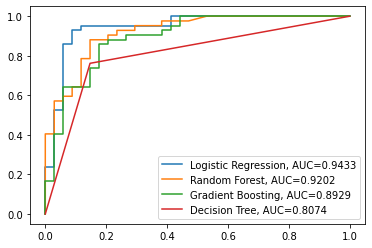

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
y_pred = LRclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
y_pred = RFclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
y_pred = GBclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#fit Decision model and plot ROC curve
y_pred = DTclassifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#add legend
plt.legend()